In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [2]:
#import dataset from data.csv file
df = pd.read_csv('Dummy_Month.csv')
df.head()

,Unnamed: 0,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,0,1001,Unoccupied,0,0,Wednesday,2021-08-04
1,1,1002,Present,0,0,Wednesday,2021-08-04
2,2,1003,Present,0,0,Wednesday,2021-08-04
3,3,1004,Unoccupied,0,0,Wednesday,2021-08-04
4,4,1005,Present,0,0,Wednesday,2021-08-04


In [81]:
df = pd.read_csv('parkingsensor_1037_1_9_2021.csv', parse_dates=['datetime'])
df['DayOfWeek'] = df['datetime'].dt.day_name()
current_df = df[df['datetime'].dt.date == datetime.now().date()]


df.head()
# current_df.head()

,bay_id,st_marker_id,status,datetime,DayOfWeek
1677652,5856,C9146,Unoccupied,2021-09-01 00:09:54,Wednesday
1677653,5718,12390N,Unoccupied,2021-09-01 00:09:54,Wednesday
1677654,6400,13653W,Unoccupied,2021-09-01 00:09:54,Wednesday
1677655,6061,13044N,Unoccupied,2021-09-01 00:09:54,Wednesday
1677656,2749,4580E,Unoccupied,2021-09-01 00:09:54,Wednesday


In [6]:
#The amount of observations (rows) and characteristics(columns) in a dataset
print ('The Total Rows in the dataset = ' + str(df.shape[0]))
print ('The Total Columns in the dataset = ' + str(df.shape[1]))

The Total Rows in the dataset = 1724756
The Total Columns in the dataset = 4


In [15]:
from datetime import datetime

# Bay_ID = (df['Bay_id'] == 1001)
# Multiple_Bay_ID = (df['Bay_id'].isin([1001, 1003, 1005]))
Parking_Status = (df['status'] == 'Present')
Day_Of_Week = (df['DayOfWeek'] == 'Wednesday')
Date = (df['datetime'].dt.date == datetime.now().date())
Hour = (df['datetime'].dt.hour == datetime.now().hour)

## 7-Day Expected Parking Availability

In [82]:

def get_daily_percentage_availability(df):
    AvailableParkingCounts = df.loc[(df['status'] == 'Present')].groupby('DayOfWeek').status.value_counts()
    UnavailableParkingCounts = df.loc[(df['status'] == 'Unoccupied')].groupby('DayOfWeek').status.value_counts()

    # Get the order of the days of week
    day_of_week_index = AvailableParkingCounts.index.get_level_values(0).values

    # unstack and reset index to present the value counts as column values
    AvailableParkingCounts = AvailableParkingCounts.unstack().reset_index()
    UnavailableParkingCounts = UnavailableParkingCounts.unstack().reset_index()

    DailyPercentageAvailability = (AvailableParkingCounts['Present'] / (AvailableParkingCounts['Present'] + UnavailableParkingCounts['Unoccupied']))

    DailyPercentageAvailability = pd.DataFrame([ {'DayOfWeek': day, 'Percentage': percentage} for (day, percentage) in zip(day_of_week_index, DailyPercentageAvailability)])
    return DailyPercentageAvailability

def visualize_trend(expected, current, x_column='DayOfWeek', y_column = 'Percentage'):
    # Visualize the results
    sns.set(font_scale=1.5)
    figure(figsize=(12, 6), dpi=80)
    sns.set_style("whitegrid")

    plt.ylabel("% Available", labelpad=14)
    plt.title("Parking Availability", y=1)

    plt.bar(expected[x_column], expected[y_column], alpha=0.4 , label="Expected")
    plt.bar(current[x_column], current[y_column], alpha=0.4 , label="Current")
    plt.legend(loc ="lower left", borderaxespad=1)
    plt.show()


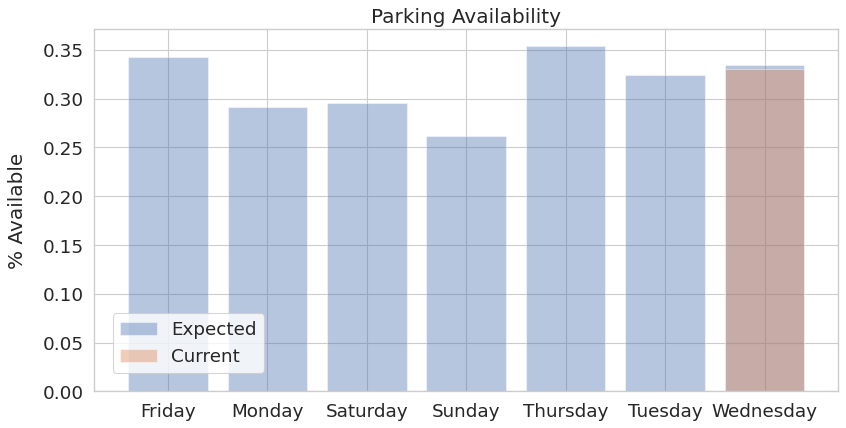

In [83]:
daily_percentage = get_daily_percentage_availability(df)
current_daily_percentage = get_daily_percentage_availability(current_df)
visualize_trend(daily_percentage, current_daily_percentage)

In [ ]:
def get_hourly_availability_trend(df):
    df['Hours'] = df['datetime'].dt.hour
    Available = df.groupby('Hours').status.value_counts()
    Available = Available.unstack().reset_index()
    Available['Availability'] = Available['Unoccupied'] / (Available['Present'] + Available['Unoccupied'])
    Available = Available.reset_index(drop=True)
    return Available[['Hours', 'Availability']]

expected_hourly_availability = get_hourly_availability_trend(df)
current_hourly_availablility = get_hourly_availability_trend(df[df['datetime'].dt.hour == datetime.now().hour])
visualize_trend(expected_hourly_availability, current_hourly_availablility, 'Hours', 'Availability')


In [119]:
datetime.now().hour

6

In [6]:
WednesdayCount = df.loc[Multiple_Bay_ID & Parking_Status & Date].groupby('Status').DayOfWeek.value_counts().unstack(0)
WednesdayCount = WednesdayCount.reset_index()
WednesdayCount.columns = ['Day_Of_Week', 'Parking_Availabilities']
WednesdayCount

,Day_Of_Week,Parking_Availabilities
0,Wednesday,139


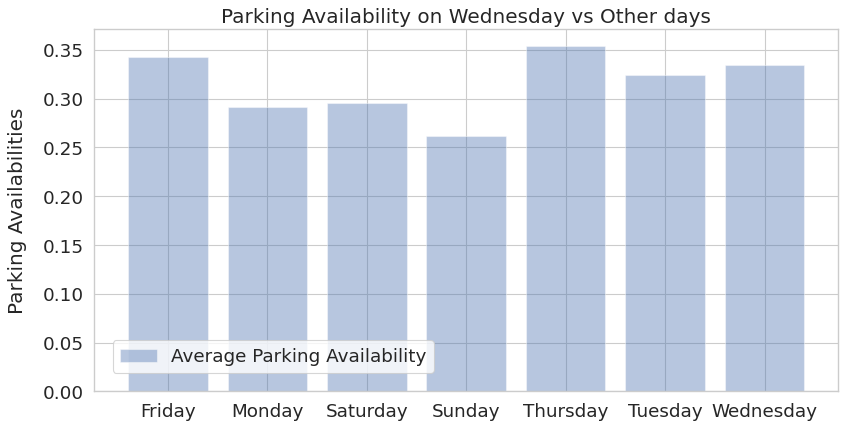

In [75]:
sns.set(font_scale=1.5)
figure(figsize=(12, 6), dpi=80)
sns.set_style("whitegrid")

plt.ylabel("Parking Availabilities", labelpad=14)
plt.title("Parking Availability on Wednesday vs Other days", y=1)

# plt.bar(CountStatus['Day_Of_Week'], CountStatus['Mean_Parking_Availabilities'],alpha=0.4 , label="4-Week Average")
# plt.bar(WednesdayCount['Day_Of_Week'], WednesdayCount['Parking_Availabilities'],alpha=0.4, label="Available Now")
plt.bar(DailyPercentageAvailability['DayOfWeek'], DailyPercentageAvailability['Percentage'], alpha=0.4 , label="Average Parking Availability")
# plt.bar(WednesdayCount['Day_Of_Week'], WednesdayCount['Parking_Availabilities'],alpha=0.4, label="Available Now")

plt.legend(loc ="lower left", borderaxespad=1)

plt.show()

## 24-Hour Expected Parking Availability (Same Day of the Week)

In [8]:
HourStatus = df.loc[Multiple_Bay_ID & Parking_Status & Day_Of_Week].groupby('Status').Hour.value_counts().unstack(0)

HourStatus = HourStatus.reset_index()
HourStatus['Present'] = (HourStatus['Present'] / 4).round(1)
HourStatus.columns = ['Hour_Of_Day', 'Mean_Parking_Availabilities']

HourStatus

,Hour_Of_Day,Mean_Parking_Availabilities
0,0,6.8
1,1,4.8
2,2,6.5
3,3,6.0
4,4,5.5
5,5,6.0
6,6,6.0
7,7,4.5
8,8,6.0
9,9,7.5


In [9]:
Wednesday_HourCount = df.loc[Multiple_Bay_ID & Parking_Status & Date & Day_Of_Week & Hour].groupby('Status').Hour.value_counts().unstack(0)
Wednesday_HourCount = Wednesday_HourCount.reset_index()
Wednesday_HourCount.columns = ['Hour_Of_Day', 'Parking_Availabilities']
Wednesday_HourCount

,Hour_Of_Day,Parking_Availabilities
0,10,7


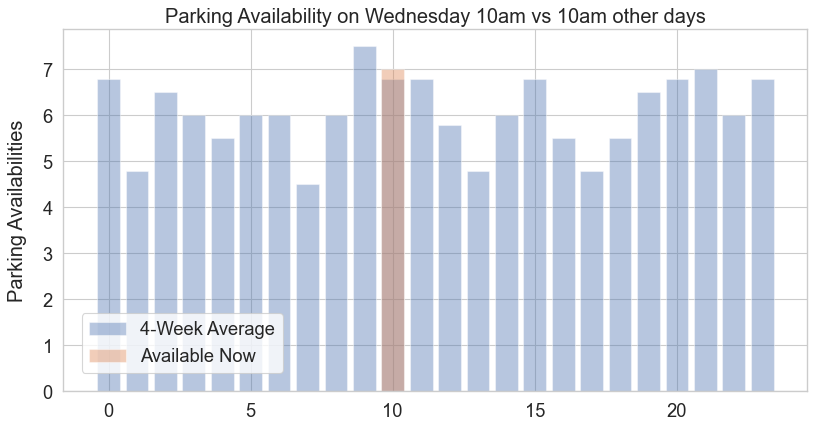

In [17]:
sns.set(font_scale=1.5)
figure(figsize=(12, 6), dpi=80)
sns.set_style("whitegrid")

plt.ylabel("Parking Availabilities", labelpad=14)
plt.title("Parking Availability on Wednesday 10am vs 10am other days", y=1)

plt.bar(HourStatus['Hour_Of_Day'], HourStatus['Mean_Parking_Availabilities'],alpha=0.4, label="4-Week Average")
plt.bar(Wednesday_HourCount['Hour_Of_Day'], Wednesday_HourCount['Parking_Availabilities'],alpha=0.4, label="Available Now")

plt.legend(loc ="lower left", borderaxespad=1)

plt.show()

## 24-Hour Expected Parking Availability (DIfferent Day of the Week)

In [11]:
DifferentDay_HourStatus = df.loc[Multiple_Bay_ID & Parking_Status].groupby('Status').Hour.value_counts().unstack(0)

DifferentDay_HourStatus = DifferentDay_HourStatus.reset_index()
DifferentDay_HourStatus['Present'] = (DifferentDay_HourStatus['Present'] / 28).round(1)
DifferentDay_HourStatus.columns = ['Hour_Of_Day', 'Mean_Parking_Availabilities']

DifferentDay_HourStatus

,Hour_Of_Day,Mean_Parking_Availabilities
0,0,5.5
1,1,5.9
2,2,6.6
3,3,6.1
4,4,6.0
5,5,6.0
6,6,6.0
7,7,5.8
8,8,6.2
9,9,5.9


In [12]:
DifferentDay_Wednesday_HourCount = df.loc[Multiple_Bay_ID & Parking_Status & Date & Day_Of_Week & Hour].groupby('Status').Hour.value_counts().unstack(0)
DifferentDay_Wednesday_HourCount = DifferentDay_Wednesday_HourCount.reset_index()
DifferentDay_Wednesday_HourCount.columns = ['Hour_Of_Day', 'Parking_Availabilities']
DifferentDay_Wednesday_HourCount

,Hour_Of_Day,Parking_Availabilities
0,10,7


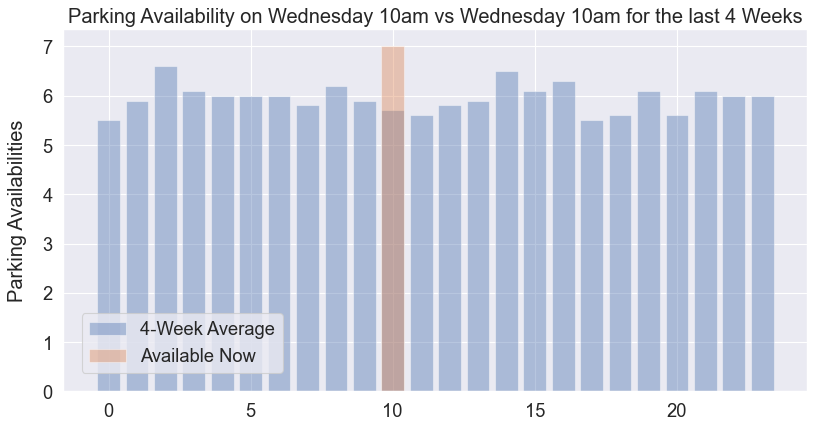

In [18]:
sns.set(font_scale=1.5)
figure(figsize=(12, 6), dpi=80)

plt.ylabel("Parking Availabilities", labelpad=14)
plt.title("Parking Availability on Wednesday 10am vs Wednesday 10am for the last 4 Weeks", y=1)

plt.bar(DifferentDay_HourStatus['Hour_Of_Day'], DifferentDay_HourStatus['Mean_Parking_Availabilities'],alpha=0.4, label="4-Week Average")
plt.bar(DifferentDay_Wednesday_HourCount['Hour_Of_Day'], DifferentDay_Wednesday_HourCount['Parking_Availabilities'],alpha=0.4, label="Available Now")

plt.legend(loc ="lower left", borderaxespad=1)

plt.show()